# 01_EXPLORE - Galaxy morphology dataset
**Date:** 07-09-2025

**Goals:** Inspect galaxy zoo 2 dataset, show label distribution, sample images and captions, quality check, and verify for leakage before training.

In [1]:
# imports
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display
from keras.src.layers import average

sns.set(style='whitegrid')

random.seed(5629)
np.random.seed(5629)

labels_filepath = r"C:\Users\user\PycharmProjects\galaxy_morphology_ml_captioning\data\labels\labels_manifest_1000.csv"
thumbnails_directory = r"C:\Users\user\PycharmProjects\galaxy_morphology_ml_captioning\data\labels\thumbs"


This section presents the inspection of the dataset for issues, as well as exploration of its structure and contents of it.

Let's start by getting familiar with the data. Here is a list of all the columns:

In [2]:
df = pd.read_csv(labels_filepath)
print("Rows: ", df.shape[0])
print("Columns: ", df.columns.tolist())
df.head()

Rows:  1000
Columns:  ['objid', 'sample', 'asset_id', 'dr7objid', 'gz2_class', 'total_classifications', 'total_votes', 't01_smooth_or_features_a01_smooth_fraction', 't01_smooth_or_features_a01_smooth_weighted_fraction', 't01_smooth_or_features_a01_smooth_debiased', 't01_smooth_or_features_a02_features_or_disk_fraction', 't01_smooth_or_features_a02_features_or_disk_weighted_fraction', 't01_smooth_or_features_a02_features_or_disk_debiased', 't01_smooth_or_features_a03_star_or_artifact_weighted_fraction', 't01_smooth_or_features_a03_star_or_artifact_debiased', 't02_edgeon_a04_yes_weighted_fraction', 't02_edgeon_a04_yes_debiased', 't02_edgeon_a05_no_weighted_fraction', 't02_edgeon_a05_no_debiased', 't03_bar_a06_bar_weighted_fraction', 't03_bar_a06_bar_debiased', 't03_bar_a07_no_bar_weighted_fraction', 't03_bar_a07_no_bar_debiased', 't04_spiral_a08_spiral_weighted_fraction', 't04_spiral_a08_spiral_debiased', 't04_spiral_a09_no_spiral_weighted_fraction', 't04_spiral_a09_no_spiral_debiased', 

,objid,sample,asset_id,dr7objid,gz2_class,total_classifications,total_votes,t01_smooth_or_features_a01_smooth_fraction,t01_smooth_or_features_a01_smooth_weighted_fraction,t01_smooth_or_features_a01_smooth_debiased,...,asset_key,objid_key,score_spiral,score_smooth,score_edge,score_merger,score_bar,derived_label,filepath_laptop,filepath_PC
0,587739505552785605,original,130549,587739505552785605,Sc?t,38.0,158.0,0.711,0.730,0.463,...,130549,587739505552785605,0.765982,0.463,0.000000,0.000000,0.0,spiral,C:\Users\79263\galaxy_morphology_ml_captioning...,C:\Users\user\PycharmProjects\galaxy_morpholog...
1,587732578312454276,original,57314,587732578312454276,SBc4t,38.0,131.0,0.842,0.842,0.027,...,57314,587732578312454276,0.929180,0.027,0.000000,0.000000,0.0,spiral,C:\Users\79263\galaxy_morphology_ml_captioning...,C:\Users\user\PycharmProjects\galaxy_morpholog...
2,587729154670395609,original,29846,587729154670395609,Sb?m,39.0,138.0,0.692,0.692,0.188,...,29846,587729154670395609,0.701607,0.188,0.000000,0.076080,0.0,spiral,C:\Users\79263\galaxy_morphology_ml_captioning...,C:\Users\user\PycharmProjects\galaxy_morpholog...
3,587732154179452963,original,52897,587732154179452963,SBb2m,30.0,237.0,0.033,0.033,0.000,...,52897,587732154179452963,0.999264,0.000,0.000000,0.034358,0.0,spiral,C:\Users\79263\galaxy_morphology_ml_captioning...,C:\Users\user\PycharmProjects\galaxy_morpholog...
4,587722983364690145,original,1129,587722983364690145,Sc?m,35.0,122.0,0.714,0.727,0.108,...,1129,587722983364690145,0.856707,0.108,0.016388,0.000000,0.0,spiral,C:\Users\79263\galaxy_morphology_ml_captioning...,C:\Users\user\PycharmProjects\galaxy_morpholog...


The manifest contains **93** columns. Every object's id (**objid**), sample from which it was taken (original or extra), a couple more ids, the class of the object using the galaxy zoo classification, the total votes that the object received, and a long list of features: criteria that people were voting upon, and the fraction of the voters that recognized every given feature in the image. In the end, are the calculated scores for every class: **score_spiral, smooth, edge, merger and bar**. It is a number between 0 and 1 representing how prominent every feature is. The derived_label column then combines all the features using logic to determine the label of the image: **spiral**, **elliptical**, **edge-on**, **merger** or **ambiguous** if a consensus was not met within the voters. **Filepath_laptop** and **filepath_PC** were added to fix the incongruous filepaths (I worked on PC and laptop simultaneously).

In [7]:
print("Basic information about the columns:\n")
display(df.info())
print("\nAmount of missing values in each column:\n")
display(df.isna().sum().sort_values(ascending=False))

Basic information about the columns:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 93 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   objid                                                          1000 non-null   int64  
 1   sample                                                         1000 non-null   object 
 2   asset_id                                                       1000 non-null   int64  
 3   dr7objid                                                       1000 non-null   int64  
 4   gz2_class                                                      1000 non-null   object 
 5   total_classifications                                          1000 non-null   float64
 6   total_votes                                                    1000 non-null   float64
 7   t01_smooth_or_features_

None


Amount of missing values in each column:



t02_edgeon_a05_no_debiased                   1
t03_bar_a07_no_bar_debiased                  1
t04_spiral_a09_no_spiral_debiased            1
t07_rounded_a16_completely_round_debiased    1
sample                                       0
                                            ..
score_merger                                 0
score_bar                                    0
derived_label                                0
filepath_laptop                              0
filepath_PC                                  0
Length: 93, dtype: int64

As can be seen, only **4** columns from **93** contain one missing value, which is not a problem, because we are going to drop them anyway. They all come from one entry: entry 476, so I were to use the columns it would be wiser to drop that row.

Now, let's check all the entries to be unique (assert that there are no duplicates):

In [8]:
print("Unique object ids:\n")
display(df.nunique())

Unique object ids:



objid              1000
sample                3
asset_id           1000
dr7objid           1000
gz2_class           128
                   ... 
score_merger        395
score_bar             1
derived_label         4
filepath_laptop    1000
filepath_PC        1000
Length: 93, dtype: int64

Therefore, all the ids are unique and the dataset is ready to be used!

Let's explore the labels' distribution. After a quick glance at the dataset, it appears to be divided into 4 equally voluminous categories. Here are all the labels and their distribution:

derived_label
spiral        250
elliptical    250
edge-on       250
merger        250
Name: count, dtype: int64


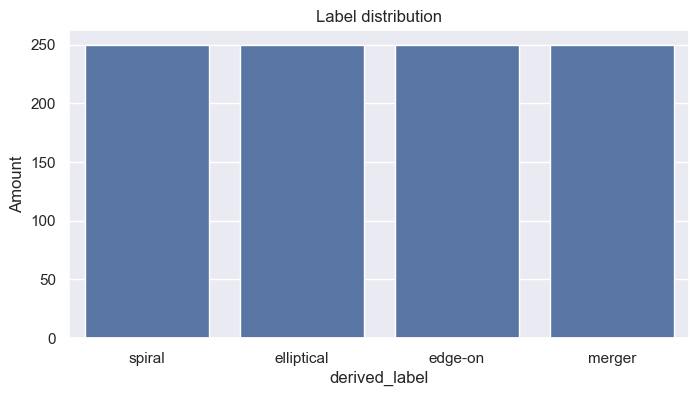

In [12]:
print(df['derived_label'].value_counts())
plt.figure(figsize = (8,4))
sns.barplot(x=df['derived_label'].value_counts().index, y=df['derived_label'].value_counts().values)
plt.ylabel('Amount')
plt.title('Label distribution')
plt.show()

It is, indeed, distributed perfectly equally.

A couple of random images with labels:



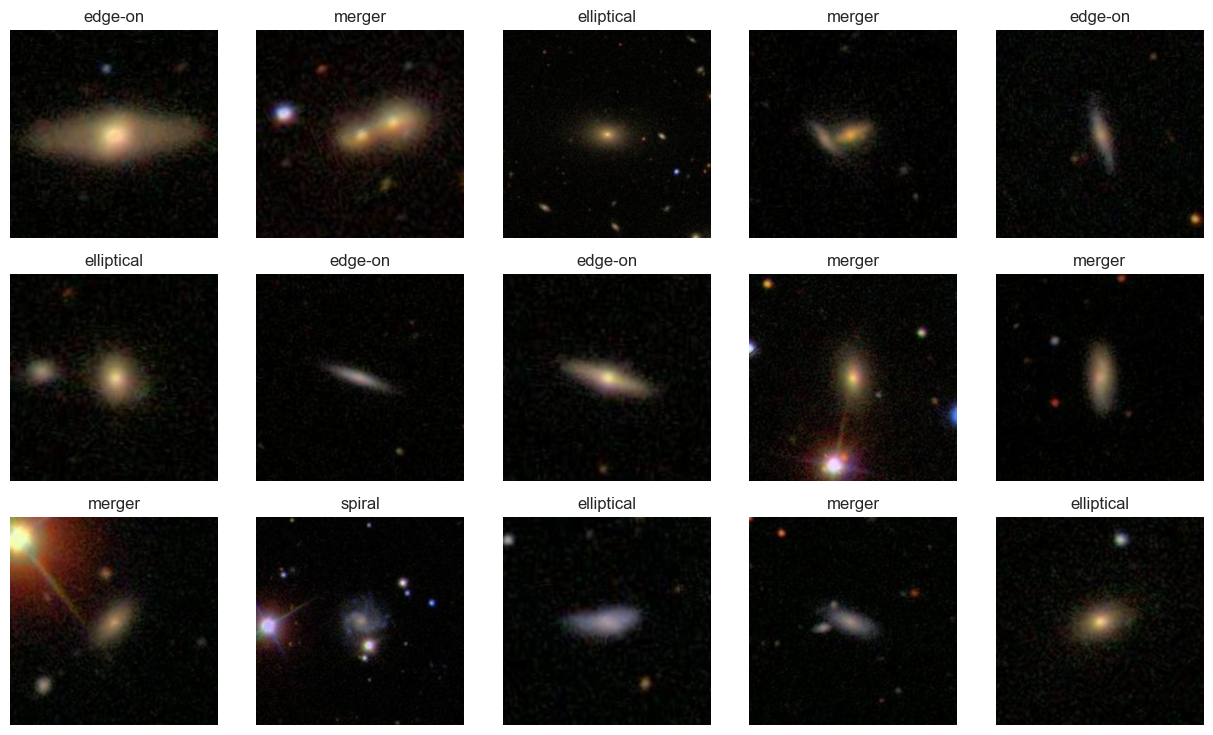

Examples of each class:



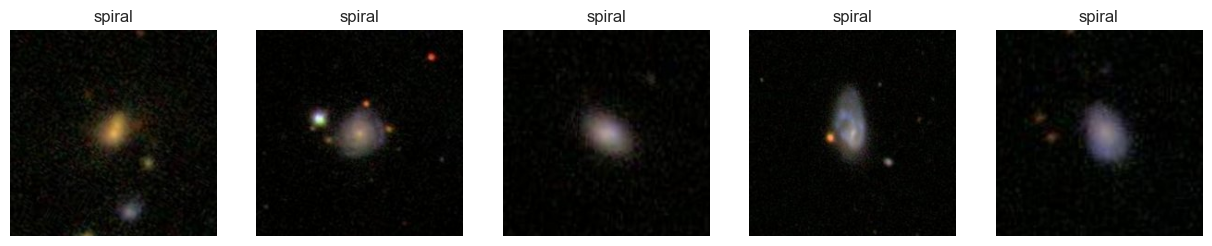

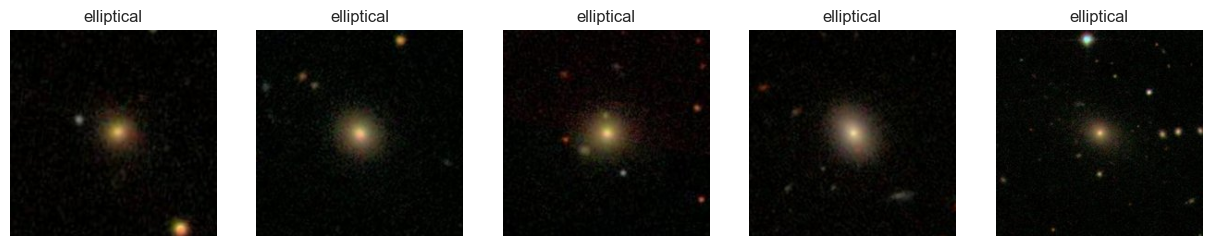

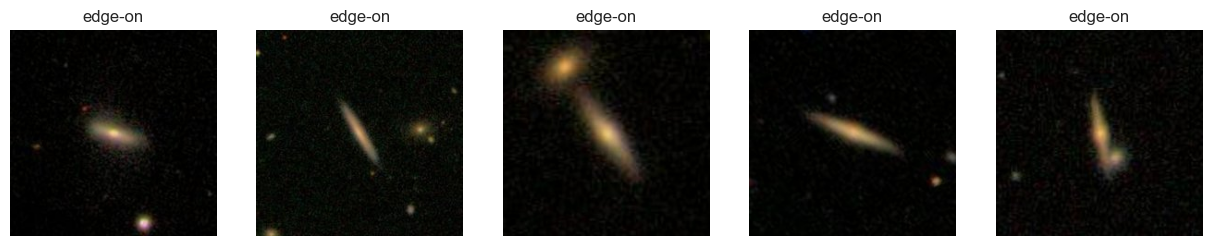

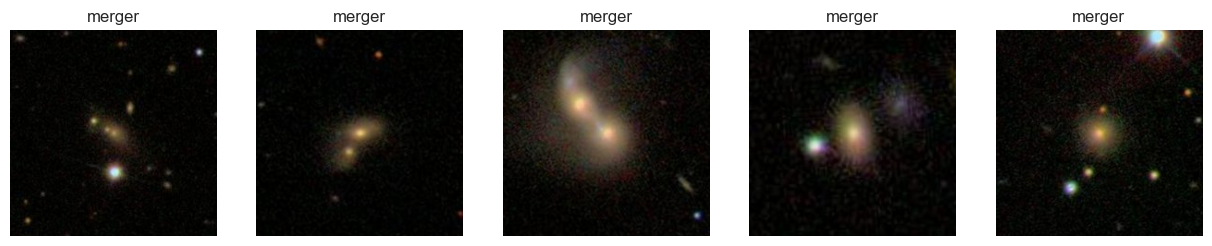

In [28]:
#partially AI-generated function
def show_images(rows=3, cols=5, label=None):
    chosen = df if label is None else df[df['derived_label']==label]
    chosen = chosen.sample(min(len(chosen), rows*cols), random_state=5629)
    fig, axs = plt.subplots(rows, cols, figsize=(cols*2.5, rows*2.5))
    axs = axs.ravel()
    for ax, (_, row) in zip(axs, chosen.iterrows()):
        img = Image.open(row['filepath_PC']).convert('RGB').resize((224,224))
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(str(row['derived_label'])[:20])
    plt.tight_layout()
    plt.show()
print("A couple of random images with labels:\n")
show_images()
print("Examples of each class:\n")
show_images(rows=1, label=df['derived_label'].value_counts().index[0])
show_images(rows=1, label=df['derived_label'].value_counts().index[1])
show_images(rows=1, label=df['derived_label'].value_counts().index[2])
show_images(rows=1, label=df['derived_label'].value_counts().index[3])

The galaxies in the sample are very varied and have distinct features. All the thumbnails are 224 by 224 pixels, 3 color channels. Artifacts can be rarely seen: chromatic aberration, gravitational lensing. Additionally, the objects are very rarely alone in the photos: this could negatively impact training. However, if the noise and out of place objects are evenly distributed, the models may learn to ignore it.

## **Captions**

As for the captions, captions.csv contains generated captions for every class. Most were automatically generated, and a few were written by hand by me

Basically:
* spiral - "A spiral galaxy with visible arms."
* elliptical - "An elliptical galaxy with a smooth light profile."
* edge-on - "A galaxy seen edge-on; disk oriented side-on."
* merger - "A galaxy showing disturbed or merger-like features."

In [58]:
captions_filepath = r"C:\Users\user\PycharmProjects\galaxy_morphology_ml_captioning\data\labels\captions.csv"
dfc = pd.read_csv(captions_filepath)
print("Here are some random captions:\n")
for c in dfc['caption'].dropna().sample(min(10, dfc['caption'].dropna().shape[0]), random_state=5629):
    print("-", c)
print("Here is the average caption length:")
print(sum(dfc['caption'].dropna().map(len).tolist())/len(dfc['caption'].dropna()))

Here are some random captions:

- A galaxy seen edge-on; disk oriented side-on.
- A galaxy showing disturbed or merger-like features.
- An elliptical galaxy with a smooth light profile.
- A galaxy showing disturbed or merger-like features.
- A galaxy seen edge-on; disk oriented side-on.
- An elliptical galaxy with a smooth light profile.
- A galaxy seen edge-on; disk oriented side-on.
- A galaxy seen edge-on; disk oriented side-on.
- A galaxy showing disturbed or merger-like features.
- A galaxy showing disturbed or merger-like features.
Here is the average caption length:
44.75


Let's look at the numeric features in the dataset:

Total numeric columns: 88


,objid,asset_id,dr7objid,total_classifications,total_votes,t01_smooth_or_features_a01_smooth_fraction,t01_smooth_or_features_a01_smooth_weighted_fraction,t01_smooth_or_features_a01_smooth_debiased,t01_smooth_or_features_a02_features_or_disk_fraction,t01_smooth_or_features_a02_features_or_disk_weighted_fraction,...,t11_arms_number_a36_more_than_4_debiased,t11_arms_number_a37_cant_tell_weighted_fraction,t11_arms_number_a37_cant_tell_debiased,asset_key,objid_key,score_spiral,score_smooth,score_edge,score_merger,score_bar
count,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,5.878114e+17,140454.676000,5.878114e+17,42.822000,168.478000,0.645814,0.652545,0.391635,0.310799,0.313714,...,0.01433,0.170842,0.165161,140454.676000,5.878114e+17,0.278923,0.391635,0.291180,0.241103,0.0
std,1.790412e+14,82977.365892,1.790412e+14,5.532352,50.373058,0.259084,0.262113,0.322136,0.266019,0.269635,...,0.09882,0.330331,0.325130,82977.365892,1.790412e+14,0.403659,0.322136,0.397370,0.354203,0.0
min,5.877230e+17,68.000000,5.877230e+17,22.000000,81.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,68.000000,5.877230e+17,0.000000,0.000000,0.000000,0.000000,0.0
25%,5.877327e+17,71215.500000,5.877327e+17,40.000000,137.750000,0.500000,0.506250,0.081000,0.098000,0.098750,...,0.00000,0.000000,0.000000,71215.500000,5.877327e+17,0.000000,0.081000,0.000000,0.000000,0.0
50%,5.877391e+17,136708.500000,5.877391e+17,43.000000,154.000000,0.732000,0.739000,0.339000,0.216000,0.214000,...,0.00000,0.000000,0.000000,136708.500000,5.877391e+17,0.000000,0.339000,0.016316,0.000000,0.0
75%,5.877426e+17,215987.750000,5.877426e+17,46.000000,182.000000,0.848000,0.857000,0.743000,0.472750,0.477000,...,0.00000,0.119750,0.112365,215987.750000,5.877426e+17,0.594429,0.743000,0.707104,0.608947,0.0
max,5.888489e+17,295148.000000,5.888489e+17,73.000000,448.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,295148.000000,5.888489e+17,1.000000,1.000000,1.000000,1.000000,0.0


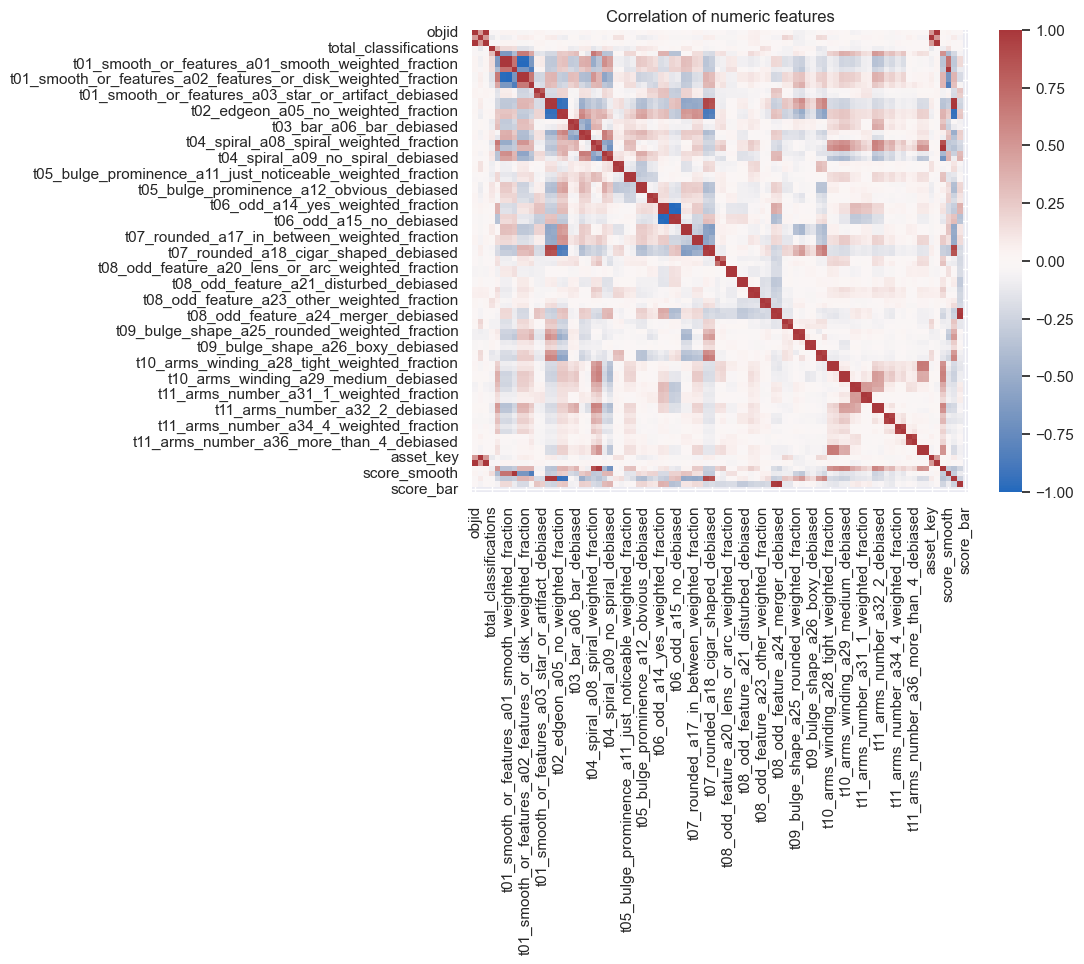

In [67]:
num_cols_list = df.select_dtypes(['int64', 'float64']).columns.tolist()
print("Total numeric columns:", len(num_cols_list))
display(df[num_cols_list].describe())
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols_list].corr(), fmt=".2f", cmap='vlag', center=0)
plt.title('Correlation of numeric features')
plt.show()

Analyzing the heatmap, almost no features show sophisticated correlation, meaning that none of the columns of the dataset are redundant.

Now a check for corrupted images:

In [81]:
issues = []
for _, r in df.iterrows():
    path = r['filepath_PC']
    if path is None or not os.path.exists(path):
        issues.append((r.get('id',None), path))
print("Missing or non-existent paths:", len(issues))
issues[:10]

Missing or non-existent paths: 0


[]

No corrupted images were found!